Position encoding matrix:  torch.Size([100, 8])
Position value matrix:  torch.Size([100, 1])

The goal is to create a set of increasingly small numbers for each dimension pair
So that the sin/cos waves change less and less as the dimension increases.
This was implemented as div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)) in the original, which is hard to read (but apparently common practice)
So 0, 2, 4 becomes 0/8, 2/8, 4/8 etc.
tensor([0.0000, 0.2500, 0.5000, 0.7500])

And then the indices are transformed into becomes 10000^(0/8), 1000^(2/8)

tensor([1.0000, 0.1000, 0.0100, 0.0010])

Which is then used to create sin/cos waves for each dimension pair
E.g. dimension 0 is sin(10000^(0/8) * position_value)
     dimension 1 is cos(10000^(0/8) * position_value)
     dimension 2 is sin(10000^(2/8) * position_value)
     dimension 3 is cos(10000^(2/8) * position_value)

And then each token samples its position on that wave for the respective dimensio

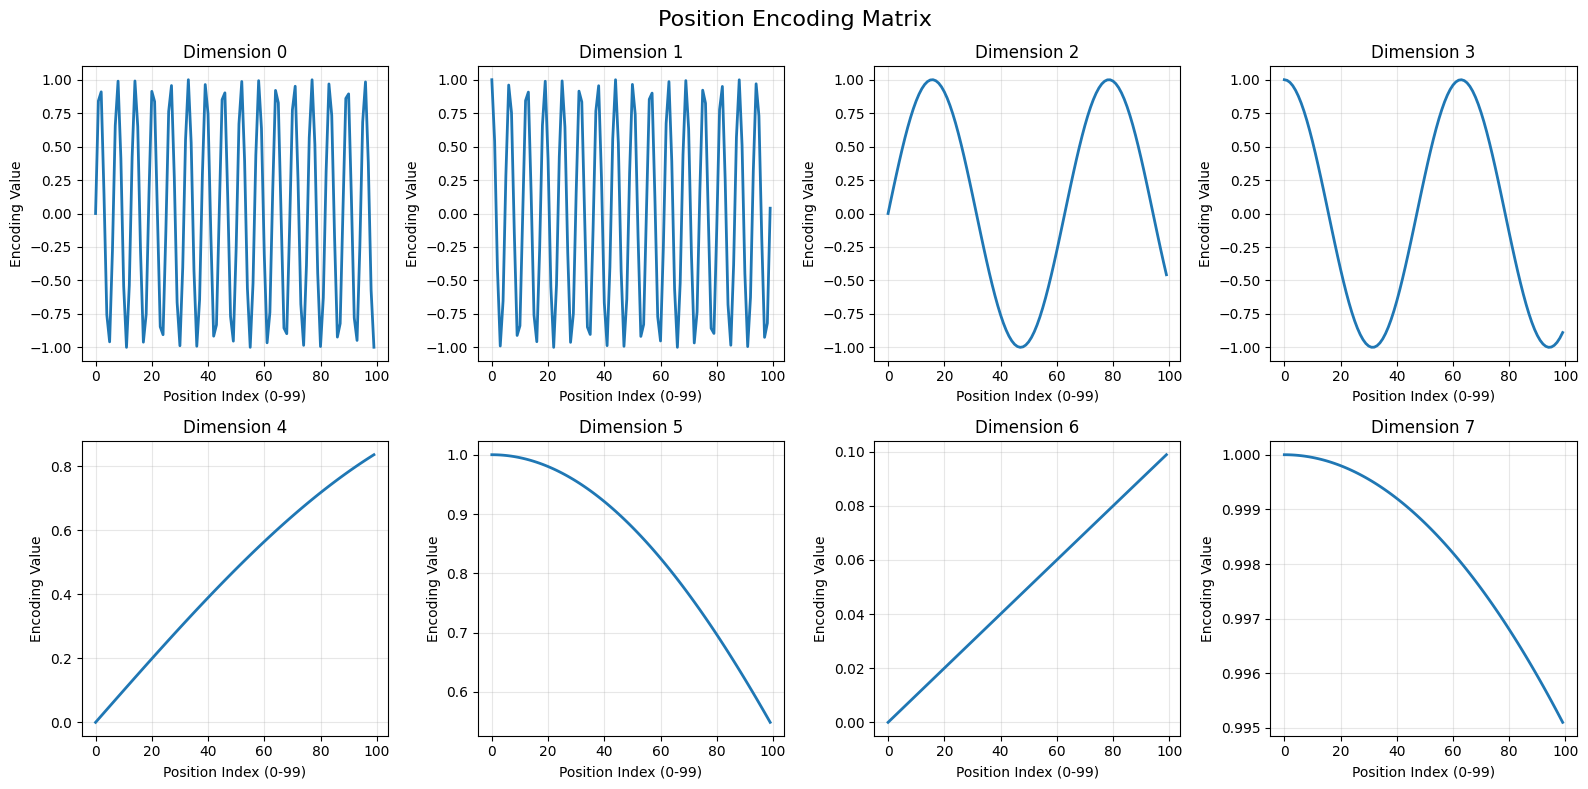

In [30]:
import torch
import matplotlib.pyplot as plt

# The maximum length of a context window (in tokens)
max_len = 100

# The dimension of the token embedding, e.g. 'The token _ing will be represented by a learned n-dimensional vector'
embed_dimension = 8

position_encoding_matrix = torch.zeros(max_len, embed_dimension)

# It's a max_len (i.e. context window) * embed_dimension matrix
print('Position encoding matrix: ', position_encoding_matrix.shape)

# Create a vector of values representing each position in the context window
position_value = torch.arange(0, max_len)

# Convert to pytorch floats
position_value = position_value.float()

# Turn it into a column vector
position_value = position_value.unsqueeze(1)
print('Position value matrix: ', position_value.shape)

print('''
The goal is to create a set of increasingly small numbers for each dimension pair
So that the sin/cos waves change less and less as the dimension increases.
This was implemented as div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)) in the original, which is hard to read (but apparently common practice)
So 0, 2, 4 becomes 0/8, 2/8, 4/8 etc.''')
div_term = torch.arange(0, embed_dimension, 2).float() / embed_dimension
print(div_term)

print('''
And then the indices are transformed into becomes 10000^(0/8), 1000^(2/8)
''')
div_term = torch.pow(10000.0, -div_term)
print(div_term)


print('''
Which is then used to create sin/cos waves for each dimension pair
E.g. dimension 0 is sin(10000^(0/8) * position_value)
     dimension 1 is cos(10000^(0/8) * position_value)
     dimension 2 is sin(10000^(2/8) * position_value)
     dimension 3 is cos(10000^(2/8) * position_value)

And then each token samples its position on that wave for the respective dimension
''')
position_encoding_matrix[:, 0::2] = torch.sin(position_value * div_term)
position_encoding_matrix[:, 1::2] = torch.cos(position_value * div_term)

print('''
Why sin/cos?  Something something rotation.  That part I couldn't follow
''')

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Position Encoding Matrix', fontsize=16)

axes = axes.flatten()

for dimension in range(embed_dimension):
    axes[dimension].plot(range(max_len), position_encoding_matrix[:, dimension], linewidth=2)

    axes[dimension].set_xlabel('Position Index (0-99)')
    axes[dimension].set_ylabel('Encoding Value')
    axes[dimension].set_title(f'Dimension {dimension}')
    axes[dimension].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

